In [10]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk                     # NLTK for text processing
from nltk.corpus import stopwords  # List of common words to remove
from nltk.stem import WordNetLemmatizer  # Lemmatizer for converting words to their base form
from nltk import pos_tag          # POS tagging function to identify word types
import re                       # Regular expressions for text cleaning
import json
import spacy
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
pd.set_option('display.max_columns', None)


In [4]:
movie_details = pd.read_json('./files/IMDB_movie_details.json', lines=True)

reviews = pd.read_json('./files/IMDB_reviews.json', lines=True)

In [5]:
movie_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [6]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [7]:
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [12]:
# Load stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Updated function
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
reviews.iloc[0]['review_text']

'In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn\'t come easy. Fortunately, failure wasn\'t a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a \'Shaws

In [14]:
clean_text(reviews.iloc[0]['review_text'])

'oscar year shawshank redemption written directed frank darabont novella rita hayworth shawshank redemption stephen king nominated seven academy awards walked away zero best picture went forrest gump shawshank pulp fiction happy nominated course hindsight 2020 history looks back gump good film pulp redemption remembered alltime best pulp however success word go making huge splash cannes making writerdirector american master two films andy dufresne co success didnt come easy fortunately failure wasnt life sentenceafter opening 33 screens take 727327 25m film fell fast theatres finished mere 283m reasons failure many firstly title clunker iconic fans today 1994 people knew cared shawshank dvd tim robbins laughs recounting fans congratulating rickshaw movie marketingwise films nightmare prison drama tough sell women story love two best friends doesnt spell winner men worst movie slow molasses desson thomson writes washington post wanders subplots every opportunity ignores abundance narrat

In [15]:
movie_details[['plot_summary','plot_synopsis']] = movie_details[['plot_summary','plot_synopsis']].applymap(clean_text)

C:\Users\jz\AppData\Local\Temp\ipykernel_22740\4157518488.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  movie_details[['plot_summary','plot_synopsis']] = movie_details[['plot_summary','plot_synopsis']].applymap(clean_text)


In [16]:
reviews[['review_text','review_summary']] = reviews[['review_text','review_summary']].applymap(clean_text)

C:\Users\jz\AppData\Local\Temp\ipykernel_22740\2006462.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reviews[['review_text','review_summary']] = reviews[['review_text','review_summary']].applymap(clean_text)


In [17]:
movie_details['release_date'][movie_details['release_date'].str.len()<10]

161        1973
276     1991-03
287     1994-02
332     1958-02
554     1957-11
796     1991-04
1208       1925
1216    1957-04
1472       1947
1497    1954-09
Name: release_date, dtype: object

In [18]:
def fill_missing_parts(date_str):
    if pd.isna(date_str):
        return np.nan

    date_str = str(date_str).strip()

    # If format is just year (YYYY)
    if re.fullmatch(r"\d{4}", date_str):
        return date_str + "-01-01"
    
    # If format is year and month (YYYY-MM)
    elif re.fullmatch(r"\d{4}-\d{2}", date_str):
        return date_str + "-01"
    
    # Already complete or unrecognized format
    return date_str

In [19]:
movie_details['release_date'] = movie_details['release_date'].apply(fill_missing_parts)

In [20]:
movie_details['release_date'][movie_details['release_date'].str.len()<10]

Series([], Name: release_date, dtype: object)

In [21]:
movie_details['release_date'] = pd.to_datetime(movie_details['release_date'],format="%Y-%m-%d")
movie_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   movie_id       1572 non-null   object        
 1   plot_summary   1572 non-null   object        
 2   duration       1572 non-null   object        
 3   genre          1572 non-null   object        
 4   rating         1572 non-null   float64       
 5   release_date   1572 non-null   datetime64[ns]
 6   plot_synopsis  1572 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 86.1+ KB


In [ ]:

reviews['review_date'] = pd.to_datetime(reviews['review_date'], format="%d %B %Y")
reviews
reviews.to_csv("./files/reviews.csv", index=False)

In [23]:
movie_details.genre

0                [Action, Thriller]
1                          [Comedy]
2                 [Comedy, Romance]
3       [Adventure, Drama, Western]
4          [Comedy, Drama, Romance]
                   ...             
1567             [Sci-Fi, Thriller]
1568                        [Drama]
1569       [Action, Drama, History]
1570                [Comedy, Drama]
1571              [Drama, Thriller]
Name: genre, Length: 1572, dtype: object

In [24]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movie_details['genre'])

genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=movie_details.index)

# Merge one-hot encoded genres back to your main dataframe
movie_details = pd.concat([movie_details, genre_df], axis=1)


In [25]:
def convert_to_minutes(duration_str):
    if pd.isna(duration_str):
        return np.nan

    duration_str = duration_str.strip().lower()
    
    # Extract hours and minutes using regex
    hours = re.search(r"(\d+)\s*h", duration_str)
    minutes = re.search(r"(\d+)\s*min", duration_str)

    h = int(hours.group(1)) if hours else 0
    m = int(minutes.group(1)) if minutes else 0

    return h * 60 + m

In [26]:
from datetime import datetime

# Today's date
today = pd.to_datetime(datetime.today().date())

# Compute difference in days
movie_details['days_since_release'] = (today - movie_details['release_date']).dt.days

reviews['days_since_review'] = (today - reviews['review_date']).dt.days


In [27]:
def convert_to_minutes(duration_str):
    if pd.isna(duration_str):
        return np.nan

    duration_str = duration_str.strip().lower()
    
    # Extract hours and minutes using regex
    hours = re.search(r"(\d+)\s*h", duration_str)
    minutes = re.search(r"(\d+)\s*min", duration_str)

    h = int(hours.group(1)) if hours else 0
    m = int(minutes.group(1)) if minutes else 0

    return h * 60 + m

In [28]:
movie_details['duration_min'] = movie_details['duration'].apply(convert_to_minutes)


In [29]:
movie_details

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days_since_release,duration_min
0,tt0105112,former cia analyst jack ryan england family va...,1h 57min,"[Action, Thriller]",6.9,1992-06-05,jack ryan ford working vacation london family ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11987,117
1,tt1204975,billy michael douglas paddy robert de niro arc...,1h 45min,[Comedy],6.6,2013-11-01,four boys around age 10 friends brooklyn 50s n...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4168,105
2,tt0243655,setting camp firewood year 1981 last day every...,1h 37min,"[Comedy, Romance]",6.7,2002-04-11,,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8390,97
3,tt0040897,fred c dobbs bob curtin luck tampico mexico 19...,2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,fred dobbs humphrey bogart bob curtin tim holt...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28191,126
4,tt0126886,tracy flick running unopposed years high schoo...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,jim mcallister matthew broderick muchadmired h...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9460,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,tt0289879,evan treborn grows small town single working m...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,year 1998 evan treborn ashton kutcher suffered...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,7738,113
1568,tt1723811,brandon 30something man living new york unable...,1h 41min,[Drama],7.2,2012-01-13,brandon michael fassbender successful handsome...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4826,101
1569,tt5013056,evacuation allied soldiers british empire fran...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,film alternates three different periods time i...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2810,106
1570,tt0104014/,beautiful 24yearold diana bruni whos happily m...,1h 33min,"[Comedy, Drama]",5.3,1992-02-21,,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12092,93


In [30]:
merged_df = reviews.merge(movie_details, how='left', on='movie_id')

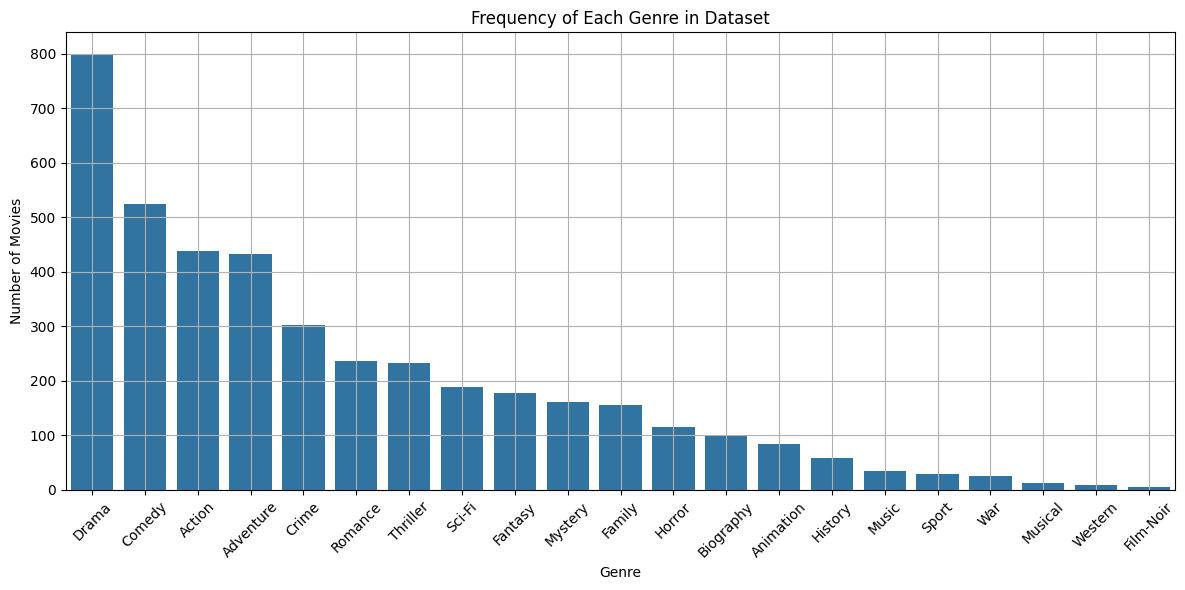

In [31]:
# List of all genre columns to include in the plot
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
    'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'
]

# Sum each genre column to count how many times each genre appears
genre_counts = movie_details[genre_columns].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Frequency of Each Genre in Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

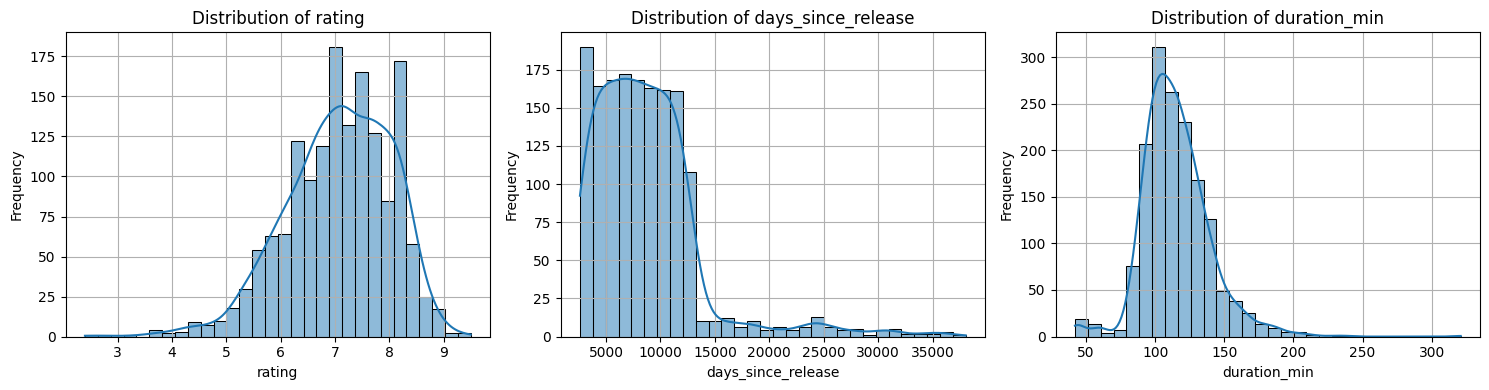

In [32]:
# Numeric columns to plot
numeric_columns = ['rating', 'days_since_release', 'duration_min']

# Plot histograms for each numeric column
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(movie_details[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [33]:
reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,days_since_review
0,2006-02-10,tt0111161,ur1898687,True,oscar year shawshank redemption written direct...,10,classic piece unforgettable filmmaking,6989
1,2000-09-06,tt0111161,ur0842118,True,shawshank redemption without doubt one brillia...,10,simply amazing best film 90s,8972
2,2001-08-03,tt0111161,ur1285640,True,believe film best story ever told film im tell...,8,best story ever told film,8641
3,2002-09-01,tt0111161,ur1003471,True,yes spoilers herethis film emotional impact fi...,10,busy dying busy living,8247
4,2004-05-20,tt0111161,ur0226855,True,heart extraordinary movie brilliant indelible ...,8,great story wondrously told acted,7620
...,...,...,...,...,...,...,...,...
573908,1999-08-08,tt0139239,ur0100166,False,go wise fast pure entertainment assembling exc...,10,best teen movie nineties,9367
573909,1999-07-31,tt0139239,ur0021767,False,well shall say ones fun rate three plotlines o...,9,go see movie,9375
573910,1999-07-20,tt0139239,ur0392750,False,go best movie ever seen ive seen lot movies re...,10,best movie ive ever seen,9386
573911,1999-06-11,tt0139239,ur0349105,False,call 1999 teenage version pulp fiction whateve...,3,havent seen,9425


In [34]:
# Load stopwords once
stop_words = set(stopwords.words('english'))

# Updated function
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return " ".join(filtered_words)

In [35]:
# Load stopwords once
stop_words = set(stopwords.words('english'))

# Updated function
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return " ".join(filtered_words)

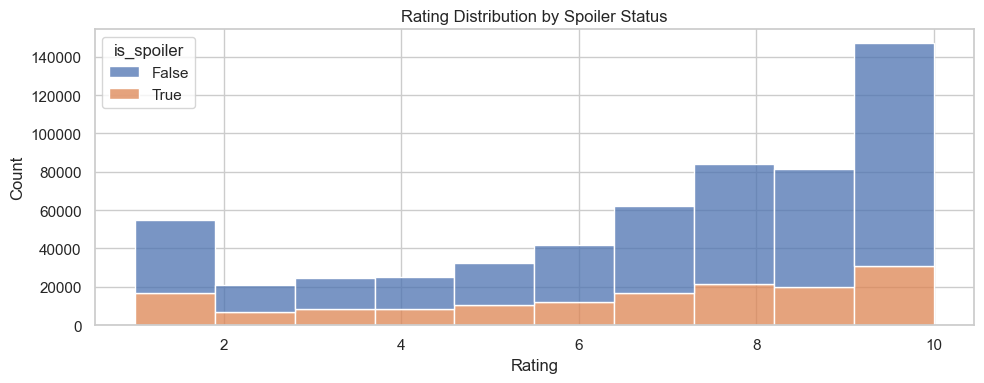

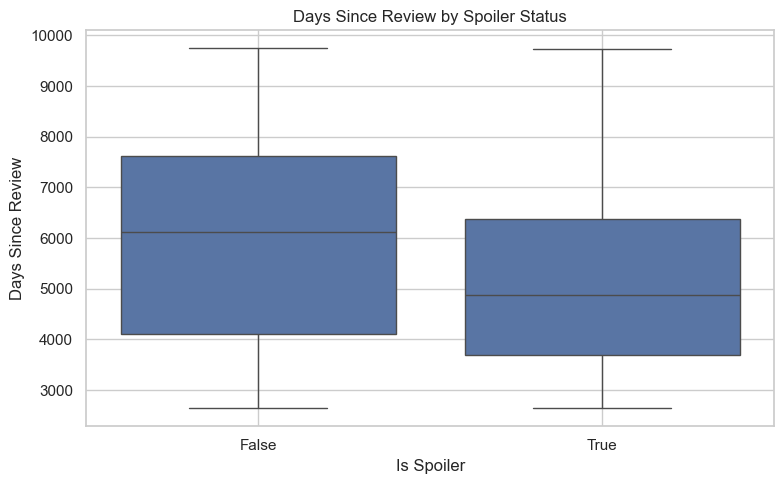

In [36]:
# Set the plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of Ratings by Spoiler Status
plt.figure(figsize=(10, 4))
sns.histplot(data=reviews, x='rating', hue='is_spoiler', bins=10, kde=False, multiple='stack')
plt.title('Rating Distribution by Spoiler Status')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Boxplot of Days Since Review by Spoiler Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews, x='is_spoiler', y='days_since_review')
plt.title('Days Since Review by Spoiler Status')
plt.xlabel('Is Spoiler')
plt.ylabel('Days Since Review')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Step 1: Total reviews per user
review_counts = reviews.groupby('user_id').size().rename('user_review_count')

# Step 2: Spoiler reviews per user
spoiler_counts = reviews[reviews['is_spoiler']].groupby('user_id').size().rename('user_spoiler_count')

# Step 3: Merge both counts back to the main DataFrame
reviews = reviews.merge(review_counts, on='user_id', how='left')
reviews = reviews.merge(spoiler_counts, on='user_id', how='left')

# Step 4: Replace NaN in spoiler count with 0 (for users who never left a spoiler)
reviews['user_spoiler_count'] = reviews['user_spoiler_count'].fillna(0).astype(int)
reviews['user_spoiler_ratio'] = reviews['user_spoiler_count'] / reviews['user_review_count']

In [38]:
print(reviews[reviews['review_text'].str.len() == 0][['user_id', 'review_text']])


Empty DataFrame
Columns: [user_id, review_text]
Index: []


In [39]:
print(reviews[reviews['review_summary'].str.len() == 0][['user_id', 'review_summary']])

           user_id review_summary
126     ur36840574               
258     ur69733923               
454     ur28178737               
565     ur33144985               
871     ur61856952               
...            ...            ...
571856   ur1857882               
572376   ur0394469               
572668   ur0204528               
573051   ur6310621               
573222   ur0556667               

[1507 rows x 2 columns]


In [40]:
# Create a new column 'has_summary' based on whether 'review_summary' is present and non-empty
reviews['has_summary'] = reviews['review_summary'].notna() & reviews['review_summary'].str.strip().ne("")

# Convert to integer (1 = has summary, 0 = no summary)
reviews['has_summary'] = reviews['has_summary'].astype(int)

# Display a preview
reviews[['review_summary', 'has_summary']][reviews['has_summary']==0]


,review_summary,has_summary
126,,0
258,,0
454,,0
565,,0
871,,0
...,...,...
571856,,0
572376,,0
572668,,0
573051,,0


In [41]:
print(movie_details[movie_details['plot_summary'].fillna('').str.len() == 0][['movie_id', 'plot_summary']])


Empty DataFrame
Columns: [movie_id, plot_summary]
Index: []


In [42]:
print(movie_details[movie_details['plot_synopsis'].fillna('').str.len() == 0][['movie_id', 'plot_synopsis']])

        movie_id plot_synopsis
2      tt0243655              
10     tt0107131              
11     tt0110364              
22     tt0101700              
24     tt0102768              
...          ...           ...
1556   tt0285531              
1564   tt0914798              
1566   tt4047038              
1570  tt0104014/              
1571  tt0114142/              

[233 rows x 2 columns]


In [43]:
# Create a binary column 'has_synopsis' to indicate if 'plot_synopsis' exists and is not empty
movie_details['has_synopsis'] = (
    movie_details['plot_synopsis'].fillna('').str.strip().str.len() > 0
).astype(int)

# Preview the result
movie_details[['movie_id', 'plot_synopsis', 'has_synopsis']].head()


,movie_id,plot_synopsis,has_synopsis
0,tt0105112,jack ryan ford working vacation london family ...,1
1,tt1204975,four boys around age 10 friends brooklyn 50s n...,1
2,tt0243655,,0
3,tt0040897,fred dobbs humphrey bogart bob curtin tim holt...,1
4,tt0126886,jim mcallister matthew broderick muchadmired h...,1


In [44]:
reviews

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,days_since_review,user_review_count,user_spoiler_count,user_spoiler_ratio,has_summary
0,2006-02-10,tt0111161,ur1898687,True,oscar year shawshank redemption written direct...,10,classic piece unforgettable filmmaking,6989,5,3,0.600000,1
1,2000-09-06,tt0111161,ur0842118,True,shawshank redemption without doubt one brillia...,10,simply amazing best film 90s,8972,4,1,0.250000,1
2,2001-08-03,tt0111161,ur1285640,True,believe film best story ever told film im tell...,8,best story ever told film,8641,1,1,1.000000,1
3,2002-09-01,tt0111161,ur1003471,True,yes spoilers herethis film emotional impact fi...,10,busy dying busy living,8247,12,6,0.500000,1
4,2004-05-20,tt0111161,ur0226855,True,heart extraordinary movie brilliant indelible ...,8,great story wondrously told acted,7620,140,19,0.135714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
573908,1999-08-08,tt0139239,ur0100166,False,go wise fast pure entertainment assembling exc...,10,best teen movie nineties,9367,1,0,0.000000,1
573909,1999-07-31,tt0139239,ur0021767,False,well shall say ones fun rate three plotlines o...,9,go see movie,9375,3,0,0.000000,1
573910,1999-07-20,tt0139239,ur0392750,False,go best movie ever seen ive seen lot movies re...,10,best movie ive ever seen,9386,1,0,0.000000,1
573911,1999-06-11,tt0139239,ur0349105,False,call 1999 teenage version pulp fiction whateve...,3,havent seen,9425,6,0,0.000000,1


In [48]:
movie_details
movie_details.to_csv("./files/movie__details.csv", index=False)